# Time to progresss on to regress(ion)

In dataexploration_01.ipynb, I explored the training data and cleaned it up

In this notebook, I'll run a few different types of linear regression models -- starting with simple OLS and moving onto some more techy ML models

The goal is to run different models using the **exact same data**, so I can compare their performance. This means that, although some models require different manipulations in the data to maximise performance (e.g. normality), I will forgo this for consistency.



Lets start off by importing the relevant libraries:

In [1]:
import pandas as pd                                 # Python library for handling structured data
from pathlib import Path                            # Clean way to work with file and folder paths
import matplotlib                                    # Core Matplotlib library
import matplotlib.pyplot as plt                     # Loads matplotlib's pypolot module for plotting graphs
import seaborn as sns                               # Statistically plotting library built on top of Matplotlib
import numpy as np                                  # Fundamental library for arrays and numerical operations
from scipy.stats import norm                        # Normal distribution object from SciPy's stats module
from scipy.stats import skew
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler    # Tool to standardise data from scikitlearn
from scipy import stats                             # Loads stats function (e.g. t-tests, correlations, distributions)
%matplotlib inline
# ^^ Makes Matplotlib plots appear inside the notebook (can zoom) ^^
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
# ^^ Makes plots look better on high-res screens ^^

pd.set_option('display.max_columns', None)  # Show all columns when displaying a dataframe
pd.set_option('display.max_rows', None)     # Show all rows when displaying a dataframe

Now, lets import our data and check that our clean training set is as we left it:

In [2]:
test_clean = pd.read_csv(Path('../data/processed/test_clean.csv'))
train_clean = pd.read_csv(Path('../data/processed/train_clean.csv'))
train_clean.head()

,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,1.0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,12.2476

In [3]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Columns: 222 entries, Id to SalePrice
dtypes: float64(10), int64(212)
memory usage: 2.5 MB


Now lets create matricies with our data for sklearn:

In [4]:
X_train_full = train_clean.drop(["SalePrice", "Id"], axis=1) # Features matrix (axis=1 drops columns, axis=0 drops rows)
y_train_full = train_clean["SalePrice"]                      # Target variable (already log-transformed)

X_test = test_clean.copy()                                  # Features matrix for test set (no target variable in test set)
y_test = None                                               # No target variable in test set

Great, now lets split the training data into train and validation:

In [5]:
from sklearn.model_selection import train_test_split
from IPython.display import display

X_train, X_valid, y_train, y_valid = train_test_split(

    X_train_full,     # This is the features matrix
    y_train_full,     # This is the target variable
    test_size=0.2, # 20% of the data will be used for validation
    random_state=42     # Setting a random state ensures reproducibility of results

)

# This code splits the original training data into two sets:
# - X_train and y_train: These will be used to train your models.
# - X_valid and y_valid: These will be used to validate your models' performance.
# The split is 80% for training and 20% for validation, and random_state=42 ensures reproducibility.

display(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
print("First 5 rows of X_train:")
display(X_train.head())
print("First 5 rows of X_valid:")
display(X_valid.head())
print("First 5 rows of X_test:")
display(X_test.head())

(1165, 220)

(292, 220)

(1165,)

(292,)

First 5 rows of X_train:


,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,1.0,20,8400,5,6,1957,1957,922.0,0.0,392.0,1314.0,1314,0,0,1314,1.0,0.0,1,0,3,1,5,0,1.0,294.0,250,0,0,0,0,0,0,6,2010,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1362,1.0,160,3180,7

First 5 rows of X_valid:


,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
497,1.0,50,9120,7,6,1925,1950,329.0,0.0,697.0,1026.0,1133,687,0,1820,1.0,0.0,2,0,4,1,8,0,1.0,240.0,0,100,0,0,0,0,0,6,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1262,1.0,70,13515

First 5 rows of X_test:


,Id,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,1.0,

Perfect! Now we can start running some models!

# Linear Regression (Ordinary Least Squares)

Definition:
- A linear approach to modelling the relationship between a dependent variable and one or more independent variables
- The model finds the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values
- Commonly used for regression tasks where the goal is to predict a continuous outcome
- Often used as a baseline model due to its simplicity and interpretability

Assumptions:
- Linearity: The relationship between the independent and dependent variables is linear
- Independence: The residuals (errors) are independent of each other
- Homoscedasticity: The residuals have constant variance at every level of the independent variable
- Normality: The residuals of the model are normally distributed
- **Note: If these assumptions are violated, the results of the linear regression may be invalid. This means that the model's predictions may be biased or unreliable.**

Strengths:
- Simplicity: Easy to understand and interpret
- Efficiency: Computationally efficient and fast to train
- Baseline: Serves as a good baseline model for comparison with more complex models

Weaknesses:
- Linearity: Assumes a linear relationship between input and output, which may not hold true
- Sensitivity: Can be sensitive to outliers and multicollinearity among predictors
- Assumptions: Assumes that the residuals (errors) are normally distributed and homoscedastic (constant variance)

Caution:
- Ensure that the assumptions of linear regression are met before applying the model
- Consider feature engineering or transformations if the relationship is not linear
- Be cautious of overfitting, especially with a large number of predictors
- Regularization techniques (like Ridge or Lasso regression) can be used to mitigate some weaknesses [will do this in subsequent models]

Steps:
1.  Fit the model on the training data
2.  Validate the model on the validation data
3.  Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE)
4.  Fine-tune the model as needed
5.  Use the model to make predictions on the test data

Instructions here: https://realpython.com/linear-regression-in-python/

In [6]:
## We'll start off with sklearn 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ols_sklearn = LinearRegression(fit_intercept= False) # Create a Linear Regression model and specify that we don't want to fit the intercept (since we've already added it)
ols_sklearn.fit(X_train, y_train) # Fit the model to the training data

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
## Now let's use statsmodels to get a detailed summary of the regression results

import statsmodels.api as sm

# Fit OLS regression
ols_sm = sm.OLS(y_train, X_train).fit()

# Show summary
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     95.47
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:32:07   Log-Likelihood:                 1137.5
No. Observations:                1165   AIC:                            -1907.
Df Residuals:                     981   BIC:                            -975.8
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.45

Quick check to prove that both libraries give the same results:

In [8]:
## Start with sklearn

y_train_pred_sklearn = ols_sklearn.predict(X_train) # Predict on the training data
y_valid_pred_sklearn = ols_sklearn.predict(X_valid) # Predict on the validation data

train_rmse_sklearn = np.sqrt(mean_squared_error(y_train, y_train_pred_sklearn))
valid_rmse_sklearn = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sklearn))

## Now with statsmodels

y_train_pred_sm = ols_sm.predict(X_train) # Predict on the training data
y_valid_pred_sm = ols_sm.predict(X_valid) # Predict on the validation data

train_rmse_sm = np.sqrt(mean_squared_error(y_train, y_train_pred_sm))
valid_rmse_sm = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sm))

# Now lets compare how each model does on the training set

print("Train RMSE:")
print(f"Sklearn OLS: {train_rmse_sklearn}")
print(f"Statsmodels OLS: {train_rmse_sm}")

print("\nValidation RMSE:")
print(f"Sklearn OLS: {valid_rmse_sklearn}")
print(f"Statsmodels OLS: {valid_rmse_sm}")

# Both models should give identical results, as they are both fitting the same linear regression model.



Train RMSE:
Sklearn OLS: 0.09114489674473816
Statsmodels OLS: 0.09114489674473801

Validation RMSE:
Sklearn OLS: 0.1367088770940546
Statsmodels OLS: 0.13670887709492388


Great, both of our OLS models are showing identical performance. For consistency, I'll just use the Statsmodel OLS model going forward.

Now that we have fit the model on the training data, we need to do the following:


1. Check all typical regression assumptions are satisfied **(model diagnostics using training data)**
    - Residuals vs fitted (to test linearity and homoscedasticity)
    - Distribution of residuals (to test normality)
2. Validate the model on the validation data (to see whether the model's errors generalise to unseen data) **(performance evaluation using validation data)**
    - Predicted vs actual plots
    - RMSE / MAE / R^2
    - Error distribution plots

3. One final check on the test data (to see how well the model performs on completely unseen data) **(final evaluation using test data)**
    - Predicted vs actual plots
    - RMSE / MAE / R^2
    - Error distribution plots



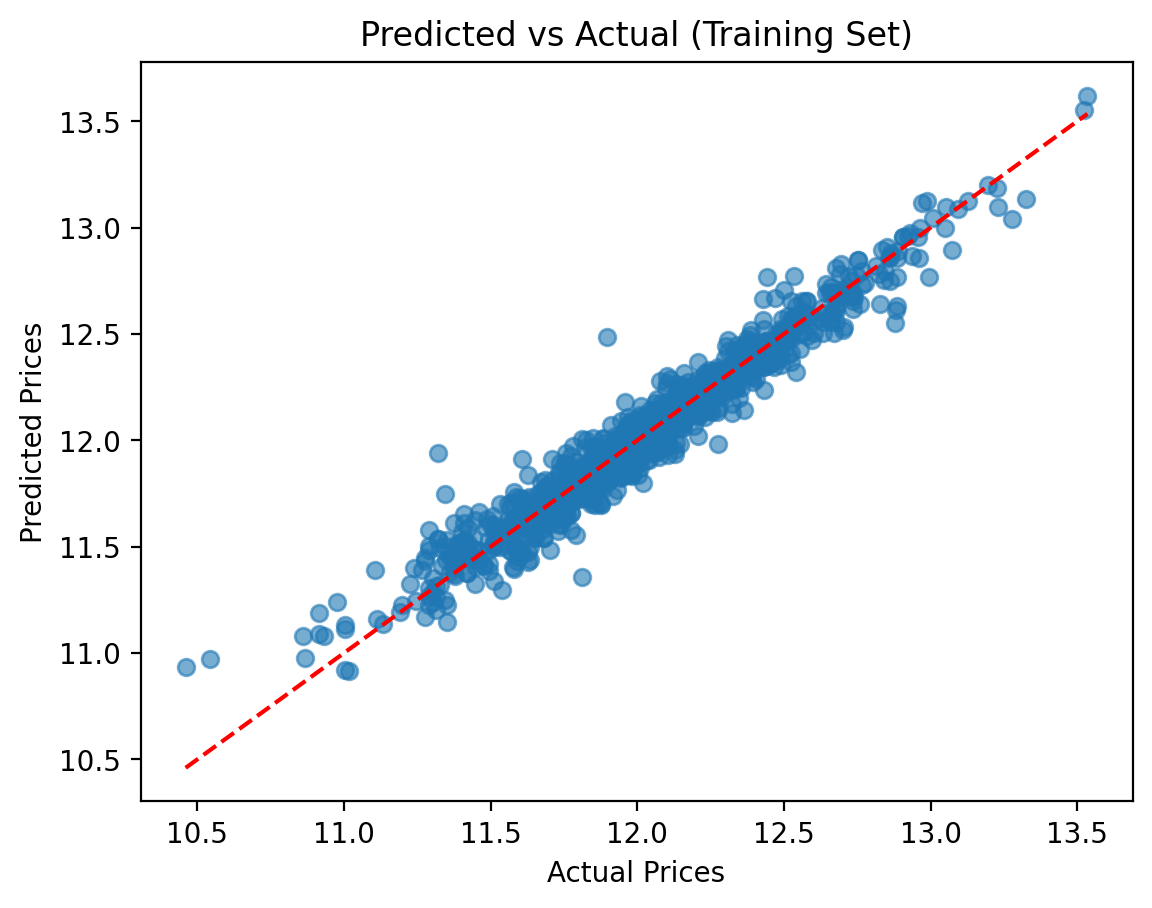

In [9]:
plt.scatter(y_train, y_train_pred_sm, alpha=0.6)    # Scatter plot of actual vs predicted prices
plt.plot([y_train.min(), y_train.max()],            
         [y_train.min(), y_train.max()],
         'r--')  # 45-degree reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual (Training Set)")
plt.show()

Now, lets check the residuals to see if they are normally distributed and homoscedastic:

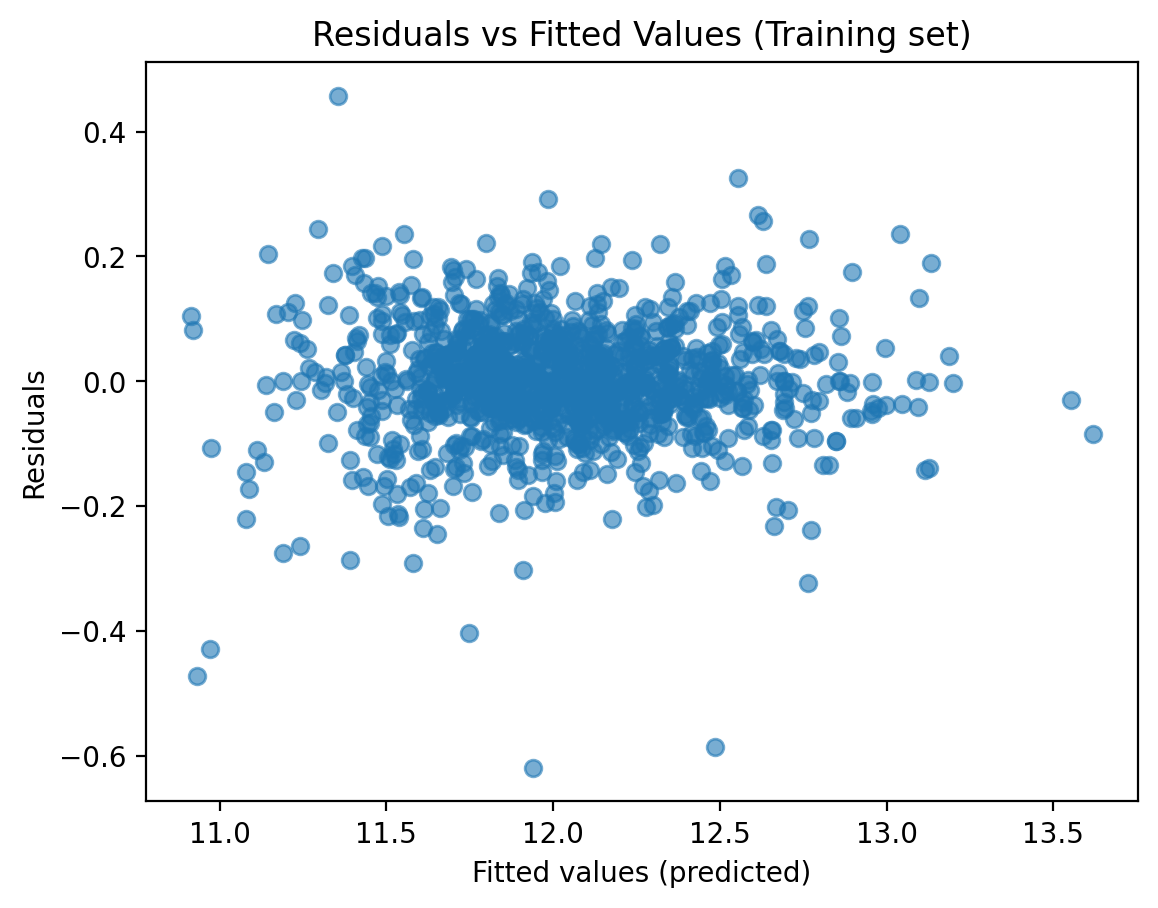

In [10]:
## Testing homoscedasticity assumption

residuals_train = y_train - y_train_pred_sm

plt.scatter(y_train_pred_sm, residuals_train, alpha=0.6)
plt.xlabel ("Fitted values (predicted)")
plt.title("Residuals vs Fitted Values (Training set)")
plt.ylabel("Residuals")

plt.show()


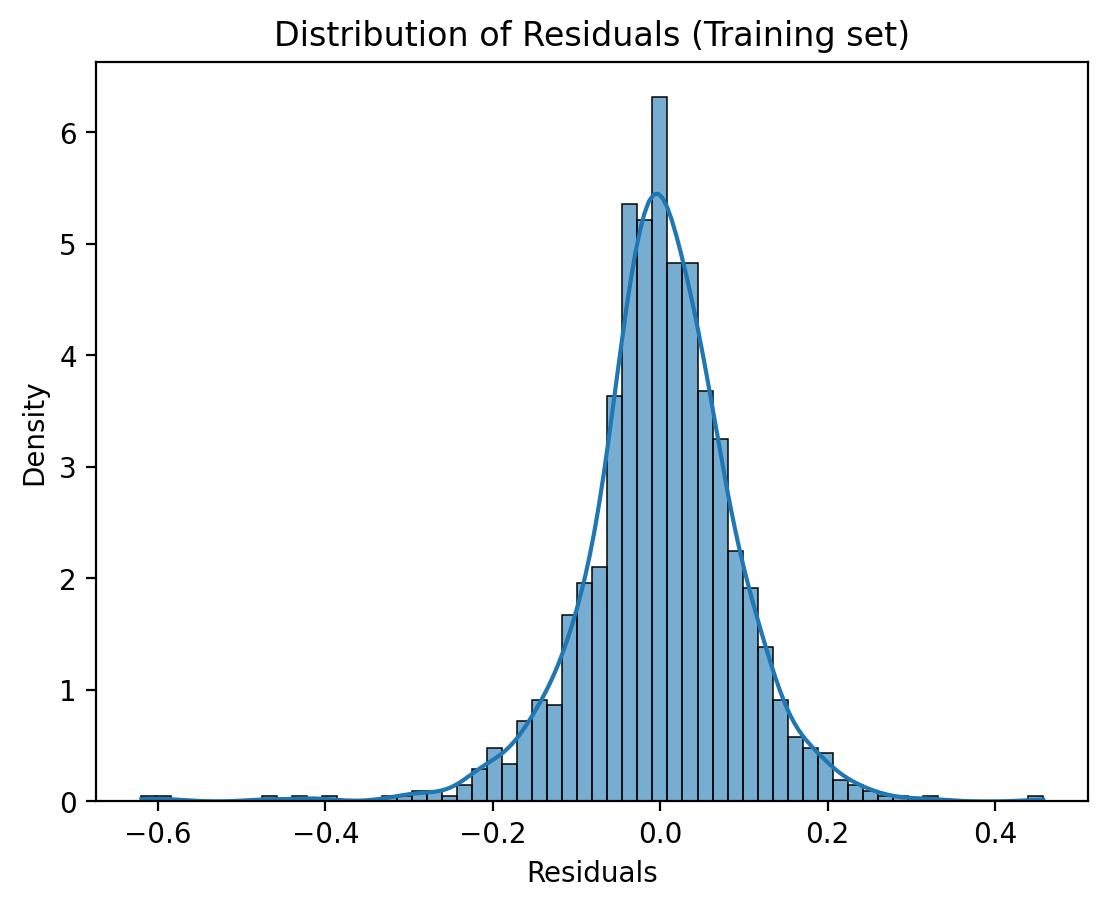

In [11]:
sns.histplot(residuals_train, kde=True, stat="density", alpha = 0.6)
plt.title("Distribution of Residuals (Training set)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


Great, it looks like the residuals are distributed somewhat normally, meaning our model is likely valid.

Now, we can move on to evaluate performance on the validation set:

In [12]:
valid_rmse_sm = np.sqrt(mean_squared_error(y_valid, y_valid_pred_sm))
r2 = r2_score(y_valid, y_valid_pred_sm)

print(f"Validation RMSE: {valid_rmse_sm:.2f}")
print(f"Validation R^2: {r2:.4f}")



Validation RMSE: 0.14
Validation R^2: 0.8923


Now, lets do some visual checks:

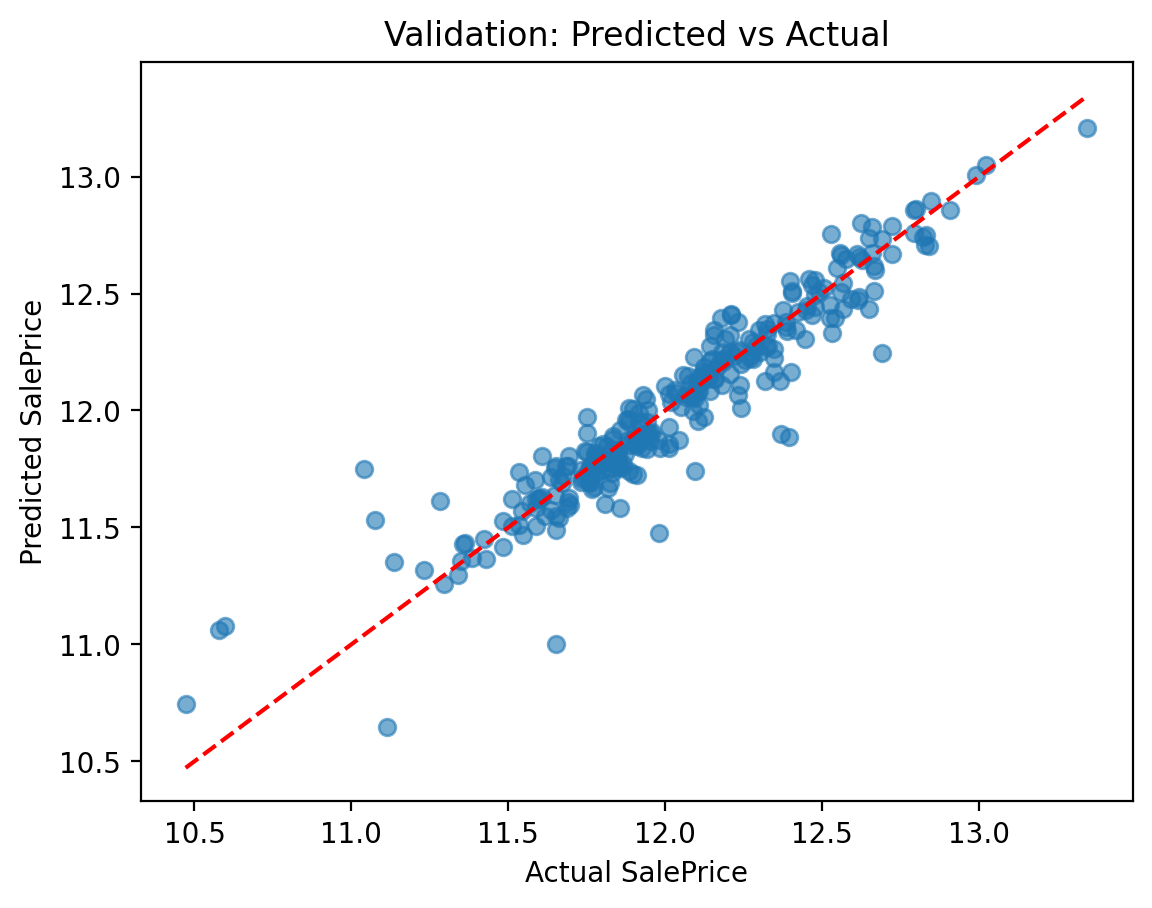

In [13]:
plt.scatter(y_valid, y_valid_pred_sm, alpha=0.6)  
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         'r--')  # perfect predictions
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation: Predicted vs Actual")
plt.show()

Looks good! The points are fairly close to the 45-degree line, indicating that the model's predictions are reasonably accurate. Now lets check the distribution of the residuals:

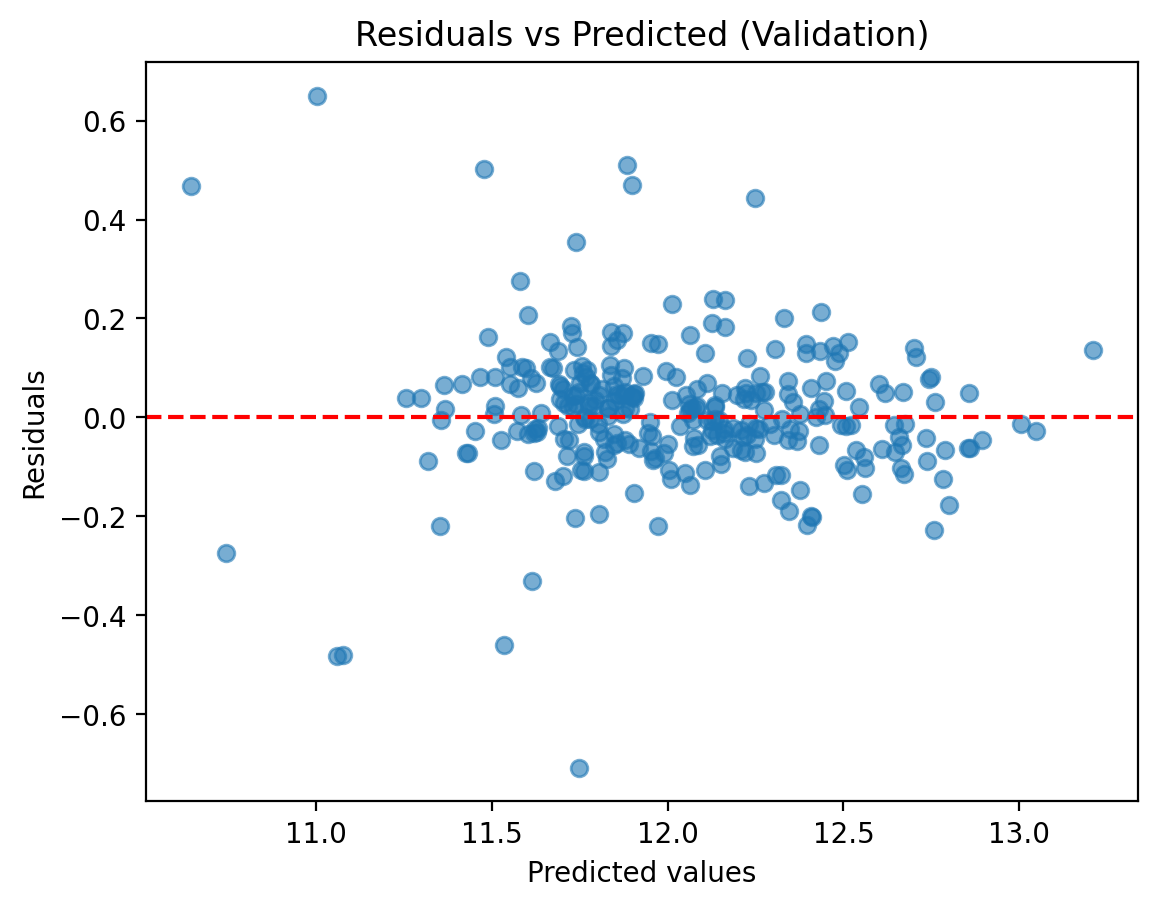

In [14]:
residuals_valid = y_valid - y_valid_pred_sm

plt.scatter(y_valid_pred_sm, residuals_valid, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Validation)")
plt.show()

# Training the model on the full training set (and then generating predictions for the test set)

In [15]:
# Training the model on the full training set (using statsmodels for detailed summary)
ols_final = sm.OLS(y_train_full, X_train_full).fit()

Ok. Now lets do some evaluation of how well the model fits the training data:

In [16]:
# MSE on the log scale (what the model was trained on)
mse_log = mean_squared_error(y_train_full, ols_final.predict(X_train_full))
rmse_log = np.sqrt(mse_log)

# MSE and RMSE on the original dollar scale
y_train_full_pred_dollars = np.exp(ols_final.predict(X_train_full))
y_train_full_true_dollars = np.exp(y_train_full)
mse_dollars = mean_squared_error(y_train_full_true_dollars, y_train_full_pred_dollars)
rmse_dollars = np.sqrt(mse_dollars)

print(f"MSE (log scale): {mse_log:.6f}")
print(f"RMSE (log scale): {rmse_log:.6f}")

print(f"MSE (dollars): {mse_dollars:,.2f}")
print(f"RMSE (dollars): {rmse_dollars:,.2f}")

MSE (log scale): 0.008988
RMSE (log scale): 0.094804
MSE (dollars): 303,728,579.81
RMSE (dollars): 17,427.81


Now, lets apply this final model to the test set:

In [17]:
# Remove 'Id' column from X_test before prediction
X_test_no_id = X_test.drop('Id', axis=1)

# Predict using the model
y_test_pred = ols_final.predict(X_test_no_id)

# Unwind the log transformation to get actual sale prices
y_test_pred = np.exp(y_test_pred)

# Combine predictions with their corresponding Ids in a DataFrame
results_df = pd.DataFrame({
    'Id': X_test['Id'],
    'SalePrice': y_test_pred
})

display(results_df.head())
display(results_df.shape)

,Id,SalePrice
0,1461,119347.027269
1,1462,156885.961192
2,1463,182588.931144
3,1464,199693.924360
4,1465,201495.156203


(1459, 2)

Sense check:

In [18]:
# Average **predicted** house price in test set
average_price = results_df['SalePrice'].mean()
print(f"Average predicted house price in test set: ${average_price:,.2f}")

# Average predicted house price in training set
average_train_price = np.exp(y_train_full).mean()
print(f"Average predicted house price in training set: ${average_train_price:,.2f}")

Average predicted house price in test set: $180,148.17
Average predicted house price in training set: $180,942.14


Ok looks good. Let's export and send it off for submission!

In [19]:
# Save results to CSV for submission
results_df.to_csv(Path('../outputs/submissions/OLS_submission.csv'), index=False)

# Results

RMSE (log scale): 0.14486

RMSE (dollars): 13,852.12278 (107th on the leaderboard out of 5831 entries!)

https://www.kaggle.com/competitions/home-data-for-ml-course/leaderboard#


# Regularised linear models (Ridge and Lasso)

Now that we have a baseline OLS model, lets try some regularised linear models to see if we can improve performance.

Regularization adds a penalty term to the loss function to shrink coefficients, improving generalization:

**Ridge Regression (L2 penalty):**

$$
\min_{\beta} \; \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2
$$

- Penalizes the sum of squared coefficients.
- Shrinks coefficients towards zero but never exactly zero.
- Useful when many features are correlated.

**Lasso Regression (L1 penalty):**

$$
\min_{\beta} \; \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$$

- Penalizes the sum of absolute coefficients.
- Can shrink some coefficients exactly to zero.
- Performs feature selection by keeping only the most important predictors.

Both methods balance model fit and complexity, controlled by the hyperparameter α (alpha). Higher values of α increase regularization strength (coefficients shrink more), while lower values reduce it (approaching standard linear regression). 





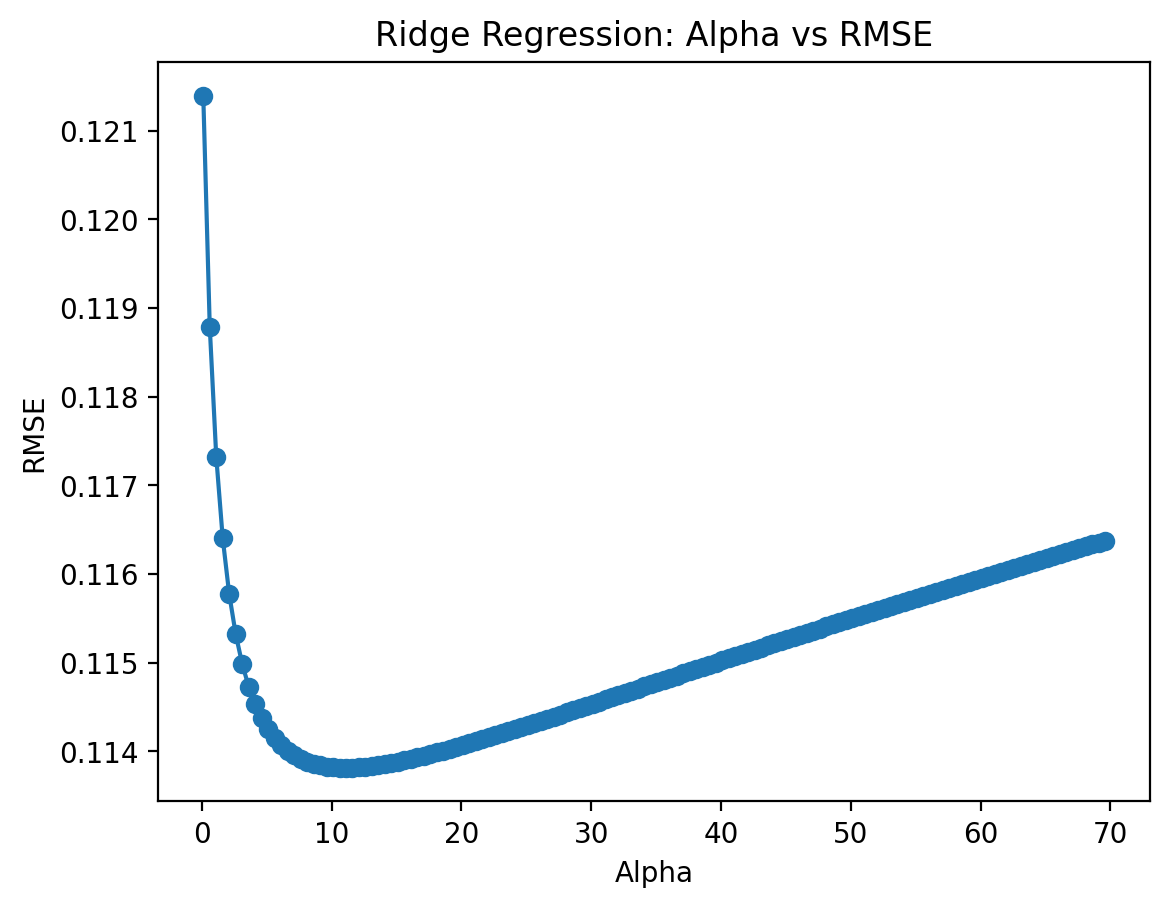

In [20]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# Define a function to calculate RMSE using cross-validation
def rmse_cv(model):                                     # Function to calculate RMSE using cross-validation
    rmse = np.sqrt(-cross_val_score(model,              # Model to evaluate
                                    X_train_full,       # Features matrix
                                    y_train_full,       # Target variable
                                    scoring="neg_mean_squared_error", # Scoring metric (negative MSE)
                                    cv=5))  # 5-fold cross-validation --> meaning the data is split into 5 parts, and the model is trained on 4 parts and validated on the remaining part, repeated 5 times
    return rmse

# Create a Ridge Regression model

model_ridge = Ridge() 

# Define different values for alpha

alpha_values = np.arange(0.1, 70.1, 0.5)  # List all numbers between 0 and 0 at 0.5 intervals

cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() 
            for alpha in alpha_values]



# Now lets make a plot of alpha values vs RMSE to visualize the results

cv_ridge = pd.Series(cv_ridge, index=alpha_values)
cv_ridge.plot(title="Ridge Regression: Alpha vs RMSE", xlabel="Alpha", ylabel="RMSE", marker='o')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()



Great! Note the shape of this curve. When alpha is too large the regularisation is too strong and the momodel cannot capture all the complexities in the data (i.e. it underfits). When alpha is too small, the model is not regularised enough and overfits the training data. The sweet spot is somewhere in the middle (around 10 in this case).

In [21]:
# Find the alpha value that gives the lowest average RMSE

best_alpha = cv_ridge.idxmin()
best_rmse = cv_ridge.min()

print(f"Best alpha: {best_alpha}")
print(f"Best RMSE: {best_rmse}")

Best alpha: 11.1
Best RMSE: 0.11381278515501055


Great, now lets move on to the Lasso regression model. This time, we'll use the LassoCV class from sklearn, **which automatically tunes the alpha parameter using cross-validation.**

In [22]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], 
                      cv=5,
                      max_iter=10000) 
model_lasso.fit(X_train_full, y_train_full)

rmse_cv(model_lasso).mean()

print(f"Best alpha: {model_lasso.alpha_}")
print(f"Best RMSE: {rmse_cv(model_lasso).mean()}")

Best alpha: 0.0005
Best RMSE: 0.1122418832875333


Nice! The Lasso model has automatically selected an alpha value of 0.0005, which gives an average RMSE of 0.1122 on the training data. This is slightly better than the Ridge model, which had an average RMSE of 0.1231.

The Lasso model also has the added benefit of performing feature selection, as it has shrunk some coefficients to zero. This can help to improve model interpretability and reduce overfitting. Let's take a look at the coefficients:

In [23]:
coef = pd.Series(model_lasso.coef_, index = X_train_full.columns) # This creates a Pandas Series where the index is the feature names and the values are the corresponding coefficients from the Lasso model.

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables") #This counts how many coefficients are non-zero (i.e., features selected by Lasso) and how many are zero (i.e., features eliminated by Lasso).

Lasso picked 89 variables and eliminated the other 131 variables


Looking good! It's important to remember that the features selected are not *necessarily* the most important features in the dataset, but rather the features that are most useful for predicting the target variable in the context of the other features. It is often helpful to try run Lasso a few times on bootstrapped samples (i.e. resampling the training data with replacement) to see which features are consistently selected.

We can also take a look directly at what the most important coefficients are:

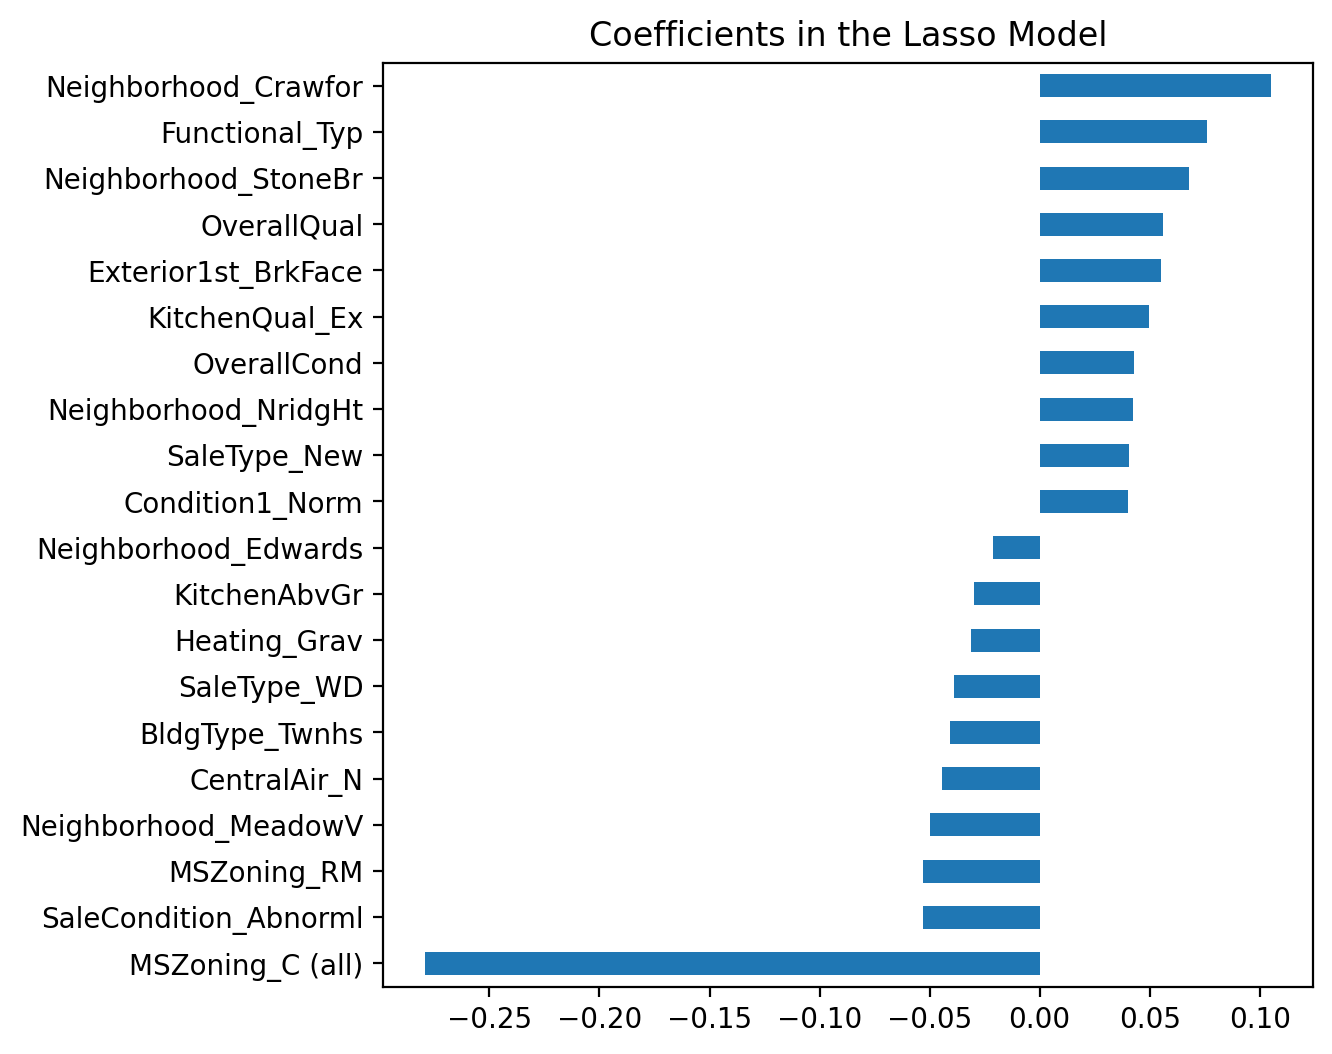

In [24]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.gcf().set_size_inches(6, 6)
plt.show()


**Note: At the moment, this isn't very helpful as I haven't scaled the coefficients. For example, a coefficient for OverallQual (a number between 1 and 10) is likely to be much larger than a coefficient for a binary variable because of the different scales. Also, since the target is log transformed its hard to interpret the coefficients directly. I will fix this in a future iteration.**

Enjoy the interpretability of the model while I can, because its about to disappear as I move onto more complex models!

<Axes: xlabel='preds', ylabel='residuals'>

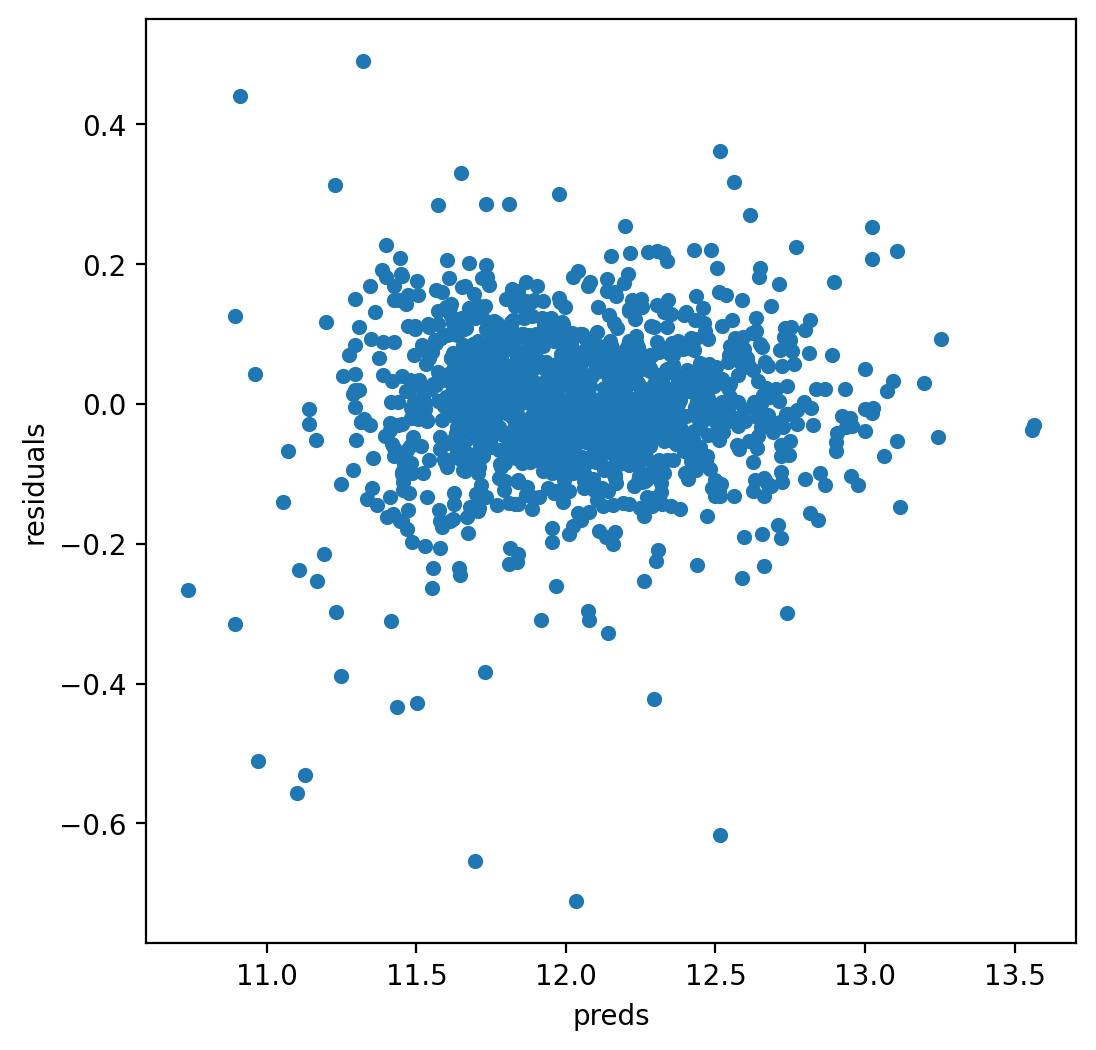

In [25]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default figure size for plots

preds = pd.DataFrame({"preds":model_lasso.predict(X_train_full), "true":y_train_full}) #
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

This looks pretty good. Now lets look at the distribution of the residuals as well:

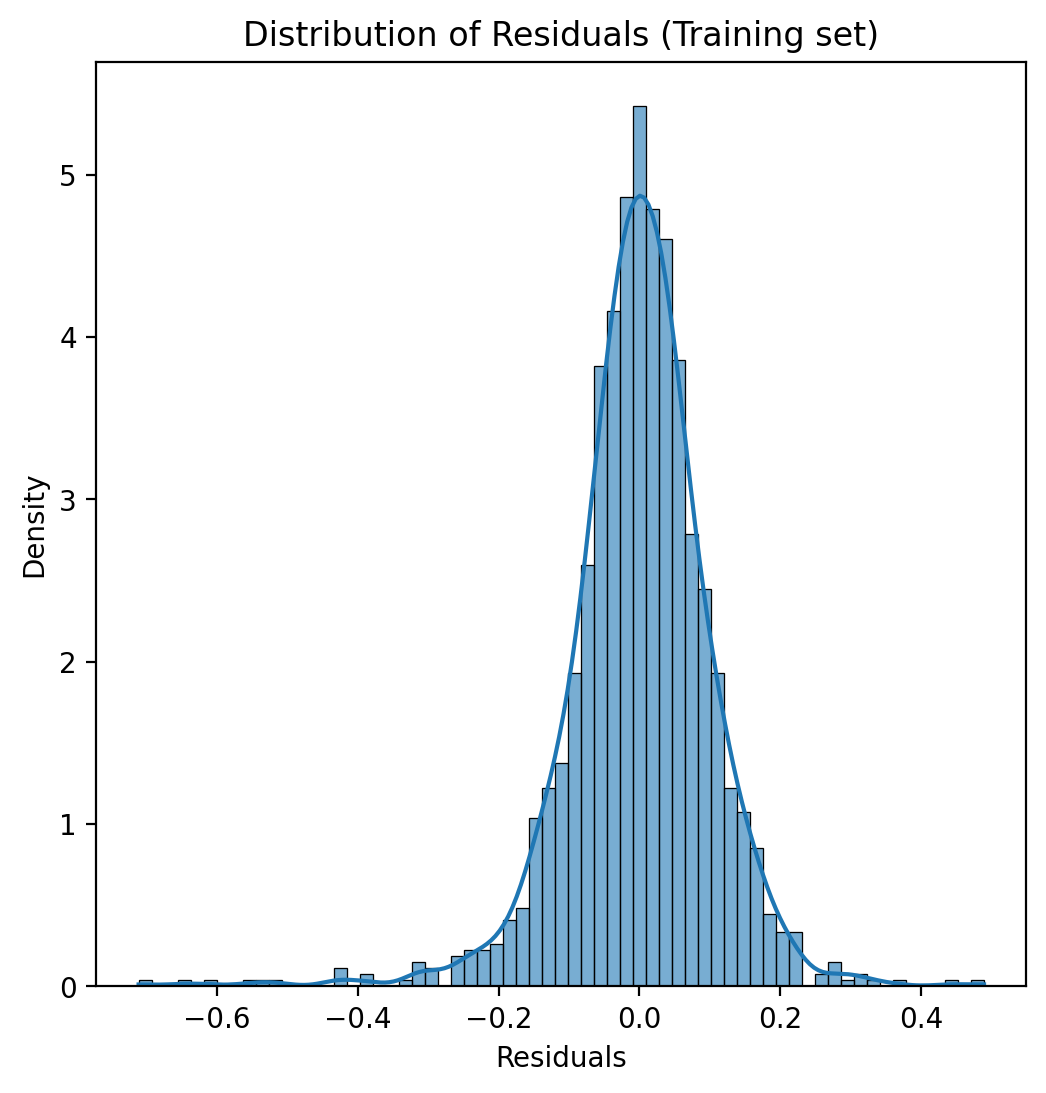

In [26]:
# Plot distribution of residuals vs normal distribution
residuals = preds["residuals"]
sns.histplot(residuals, kde=True, stat="density", alpha = 0.6)
plt.title("Distribution of Residuals (Training set)")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

Great. All looks good. Clearly, the Lasso model performed better than the Ridge model, so I'll use this to fit the test data and submit to the leaderboard:

In [27]:
# Fit test data and submit to leaderboard

# Remove 'Id' column from X_test before prediction
X_test_no_id = X_test.drop('Id', axis=1)

# Predict using the model
y_test_pred = model_lasso.predict(X_test_no_id)

# Unwind the log transformation to get actual sale prices
y_test_pred = np.exp(y_test_pred)

# Combine predictions with their corresponding Ids in a DataFrame
results_df = pd.DataFrame({
    'Id': X_test['Id'],
    'SalePrice': y_test_pred
})

display(results_df.head())
display(results_df.shape)

,Id,SalePrice
0,1461,120411.717745
1,1462,147753.422427
2,1463,178885.951447
3,1464,199773.120476
4,1465,195481.479209


(1459, 2)

Sense check:

In [28]:
# Average **predicted** house price in test set
average_price = results_df['SalePrice'].mean()
print(f"Average predicted house price in test set: ${average_price:,.2f}")

# Average predicted house price in training set
average_train_price = np.exp(y_train_full).mean()
print(f"Average predicted house price in training set: ${average_train_price:,.2f}")

Average predicted house price in test set: $179,304.32
Average predicted house price in training set: $180,942.14


Looks good. Lets save:

In [29]:
# Save results to CSV for submission
results_df.to_csv(Path('../outputs/submissions/LASSO_submission.csv'), index=False)